
# AIエンジニアリング　中間レポート

## はじめに

- ファイル名は `学籍番号.ipynb` とすること
- テキストはこのように Markdown で書くこと
- Markdownを知らない人はGoogle検索してください
- 適時コード中にコメントを書く形でも良い
- 学習するモデルは1つでもいいし、それ以上でも良い
- scikit-learn で可能な範囲内で頑張ってみてください

## 採点基準

- (↑優先順位高)
- なにをどうしているか、きちんと適切なコメントあるいはMarkdownを書く
- 今回の問題に即した適切なモデルを使う(分類か？回帰か？など)
- 過学習していないこと
- なるべくきれいなコードを心がける
- 学習しなかったデータに対しても高い精度が出せること
- 学習アルゴリズムに対してパラメータ(引数)を明示的に指定する場合は、引数の意味などを書く
- 講義で紹介しなかった手法などを使ってみると良いが、その場合はなぜその手法を選んだのか、どういう手法なのかを書くとなお良い
- 精度が高い方が良いに越したことはないですが、他の要素より優先順位は低めです
- (↓優先順位低)

## CIFAR-10 の読み込み

画像データセットの CIFAR-10 を読み込みます。このセルは編集しなくても構いません。

Using TensorFlow backend.


170500096/170498071 [==============================] - 50s 0us/step


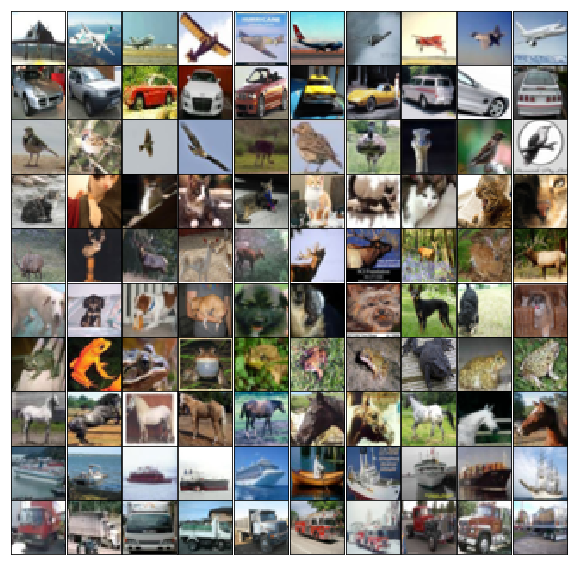

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(x_train, y_train), _ = cifar10.load_data()
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
x_train = x_train / 255; x_test = x_test / 255
n_train, n_test = x_train.shape[0], x_test.shape[0]
fig = plt.figure(figsize = (10, 10))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(10):
    index, cnt = 0, 0
    while(True):
        if y_train[index] == i:
            ax = fig.add_subplot(10, 10, i*10+cnt+1, xticks=[], yticks=[])
            ax.imshow(x_train[index])
            cnt += 1
        if cnt >= 10: break
        index += 1
plt.show()

CIFAR-10 は上記のような 28x28 ピクセルのフルカラー画像を分類するデータセット。
10クラス分類で、以下のクラスがある
- 0: airplane (飛行機)
- 1: automobile (乗用車)
- 2: bird (鳥)
- 3: cat (ネコ)
- 4: deer (シカ)
- 5: dog (イヌ)
- 6: frog (カエル)
- 7: horse (ウマ)
- 8: ship (船舶)
- 9: truck (トラック、トレーラー)

In [0]:
# 扱いやすい形式に変形しておきます
x_train, x_test = x_train.reshape(n_train, -1), x_test.reshape(n_test, -1)
y_train = y_train.ravel(); y_test = y_test.ravel()

In [0]:
# x_train, x_test, y_train, y_test の shape を見る
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# x_train, x_test のデータ数
n_train, n_test = x_train.shape[0], x_test.shape[0]
print(n_train, n_test)

(35000, 3072) (15000, 3072)
(35000,) (15000,)
35000 15000


## モデルを作って検証する



ここから先はいろいろ改良して良いモデルを作ってください。

学習データをうまく分類できるからといって良いモデルとは限らないことに注意してください。


In [0]:
# サンプル 
# Ridge を使って分類してみます
import numpy as np
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier(alpha=1.0)
model.fit(x_train, y_train)

# 学習データに対する精度
print("Train acc = ", model.score(x_train, y_train))

# テストデータに対する精度
print("Test acc = ", model.score(x_test, y_test))

Train acc =  0.5259714285714285
Test acc =  0.36533333333333334


Ridgeを使った結果、（以下略）〜

## 以下レポート内容
>>>>>17D3170008　佐藤和樹



使う手法：ランダムフォレスト

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(x_train, y_train), _ = cifar10.load_data()
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
x_train = x_train / 255; x_test = x_test / 255
n_train, n_test = x_train.shape[0], x_test.shape[0]


In [0]:
x_train, x_test = x_train.reshape(n_train, -1), x_test.reshape(n_test, -1)
y_train = y_train.ravel(); y_test = y_test.ravel()
#↑ここまでテンプレートからの引用
#データの中身の表示などは見づらくなるため外しました

In [0]:
#ノルムかけて標準化することで外れ値の影響を少なくする
x_train = x_train / np.linalg.norm(x_train, ord=2, axis=1, keepdims=True)
x_test = x_test / np.linalg.norm(x_test, ord=2, axis=1, keepdims=True)

In [0]:
#分類のためにrandomforest、評価のためにaccuracyをインポート
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#深度を8にすることで過学習を防ぐ。8にしたのは手作業で確認し、一番良さげな値がこれだったため
#n_estimatorsは明示的に指定しておかないとFuturewarningがうるさかったので、デフォルトである10を入れてます
clf = RandomForestClassifier(n_estimators=10,max_depth=8)

#学習用データを使って学習させる
clf.fit(x_train, y_train)

#学習データの方で正解率を評価
#predictは学習結果にデータを投げて予測を出す関数
print("train:", accuracy_score(y_train, clf.predict(x_train)))
#テストデータの方で正解率を評価
print("test:", accuracy_score(y_test,  clf.predict(x_test)))

train: 0.45685714285714285
test: 0.36046666666666666
